In [ ]:
! mkdir p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 24.1MB/s]
100% 163M/163M [00:08<00:00, 20.7MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
!ls

data  face-mask-dataset.zip  p	sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[:5])
print(with_mask_files[-5:])
print(len(with_mask_files))
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[:5])
print(without_mask_files[-5:])
print(len(without_mask_files))

['with_mask_2021.jpg', 'with_mask_3111.jpg', 'with_mask_1236.jpg', 'with_mask_3088.jpg', 'with_mask_1657.jpg']
['with_mask_689.jpg', 'with_mask_2017.jpg', 'with_mask_3505.jpg', 'with_mask_356.jpg', 'with_mask_2520.jpg']
3725
['without_mask_151.jpg', 'without_mask_1129.jpg', 'without_mask_2143.jpg', 'without_mask_585.jpg', 'without_mask_1170.jpg']
['without_mask_2523.jpg', 'without_mask_1941.jpg', 'without_mask_55.jpg', 'without_mask_2805.jpg', 'without_mask_3247.jpg']
3828


In [ ]:
with_mask_labels=[1]*len(with_mask_files)
print(with_mask_labels[:5])
without_mask_labels=[0]*len(without_mask_files)
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


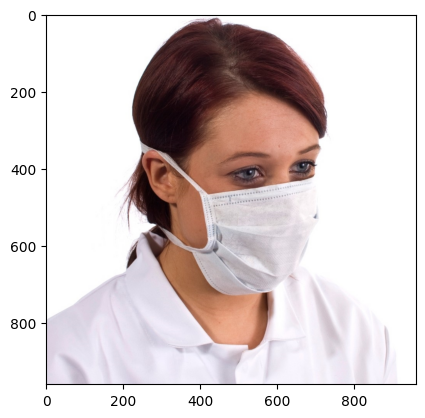

In [ ]:
img = mgimg.imread("/content/data/with_mask/with_mask_3189.jpg")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
with_mask_path='/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image  =image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image  =image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

array([[[110,  92,  92],
        [113,  91,  93],
        [116,  90,  94],
        ...,
        [235, 254, 225],
        [237, 254, 226],
        [238, 254, 227]],

       [[117,  97,  98],
        [118,  96,  99],
        [121,  94,  99],
        ...,
        [237, 253, 225],
        [237, 253, 225],
        [238, 252, 226]],

       [[124, 103, 103],
        [124, 100, 102],
        [125,  97, 101],
        ...,
        [238, 253, 225],
        [238, 252, 225],
        [238, 250, 225]],

       ...,

       [[ 43,  33,  49],
        [ 41,  31,  48],
        [ 40,  30,  47],
        ...,
        [200, 174, 139],
        [197, 175, 132],
        [194, 175, 127]],

       [[ 44,  32,  50],
        [ 42,  31,  48],
        [ 42,  30,  47],
        ...,
        [198, 174, 130],
        [197, 174, 129],
        [196, 175, 128]],

       [[ 49,  36,  54],
        [ 48,  34,  52],
        [ 48,  34,  51],
        ...,
        [195, 171, 122],
        [197, 175, 126],
        [198, 176, 129]]], dtype=uint8)
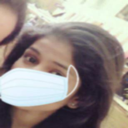

In [ ]:
data[0]

In [ ]:
X= np.array(data)
Y= np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7553, 128, 128, 3)
(7553,)
(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[7]

array([[[0.94901961, 0.96078431, 0.98039216],
        [0.94901961, 0.96078431, 0.98039216],
        [0.94901961, 0.96078431, 0.98039216],
        ...,
        [0.95686275, 0.97254902, 0.97647059],
        [0.95686275, 0.97254902, 0.97647059],
        [0.95686275, 0.97254902, 0.97647059]],

       [[0.94901961, 0.96078431, 0.98039216],
        [0.94901961, 0.96078431, 0.98039216],
        [0.94901961, 0.96078431, 0.98039216],
        ...,
        [0.95686275, 0.97254902, 0.97647059],
        [0.95686275, 0.97254902, 0.97647059],
        [0.95686275, 0.97254902, 0.97647059]],

       [[0.94901961, 0.96078431, 0.98039216],
        [0.94901961, 0.96078431, 0.98039216],
        [0.94901961, 0.96078431, 0.98039216],
        ...,
        [0.95686275, 0.97254902, 0.97647059],
        [0.95686275, 0.97254902, 0.97647059],
        [0.95686275, 0.97254902, 0.97647059]],

       ...,

       [[0.1254902 , 0.08627451, 0.08235294],
        [0.13333333, 0.10196078, 0.09411765],
        [0.10588235, 0

In [ ]:
X_test_scaled[0]

array([[[0.71764706, 0.63921569, 0.63529412],
        [0.71372549, 0.63137255, 0.62745098],
        [0.71764706, 0.63529412, 0.63137255],
        ...,
        [0.09019608, 0.        , 0.09019608],
        [0.09019608, 0.        , 0.09019608],
        [0.09019608, 0.        , 0.09019608]],

       [[0.70980392, 0.63137255, 0.62745098],
        [0.71372549, 0.63529412, 0.63137255],
        [0.70980392, 0.62745098, 0.62352941],
        ...,
        [0.09019608, 0.        , 0.09019608],
        [0.09019608, 0.        , 0.09019608],
        [0.09019608, 0.        , 0.09019608]],

       [[0.70196078, 0.62352941, 0.61960784],
        [0.70588235, 0.62745098, 0.62352941],
        [0.70980392, 0.63137255, 0.62745098],
        ...,
        [0.09019608, 0.        , 0.09019608],
        [0.09019608, 0.        , 0.09019608],
        [0.09019608, 0.        , 0.09019608]],

       ...,

       [[0.65098039, 0.68235294, 0.65490196],
        [0.55686275, 0.56862745, 0.56862745],
        [0.36470588, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model= keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6993 - loss: 0.5721 - val_accuracy: 0.8843 - val_loss: 0.2885
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8851 - loss: 0.2942 - val_accuracy: 0.9091 - val_loss: 0.2526
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9037 - loss: 0.2452 - val_accuracy: 0.9207 - val_loss: 0.2346
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9262 - loss: 0.1989 - val_accuracy: 0.9074 - val_loss: 0.2406
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9373 - loss: 0.1634 - val_accuracy: 0.9124 - val_loss: 0.2707
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9462 - loss: 0.1412 - val_accuracy: 0.9240 - val_loss: 0.2093
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9592 - loss: 0.1115 - val_accuracy: 0.9455 - val_loss: 0.2084
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9636 - loss: 0.0937 - val_acc

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print(loss)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9291 - loss: 0.3142
0.28318437933921814
0.9351422786712646


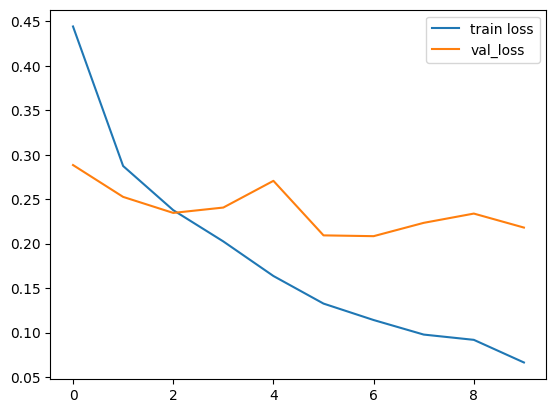

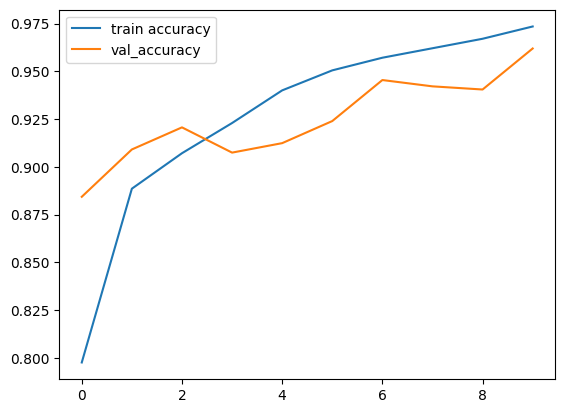

In [ ]:
h= history
plt.plot(h.history['loss'],label ='train loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(h.history['accuracy'],label ='train accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()


path of the image to be predicted/content/images.jpeg


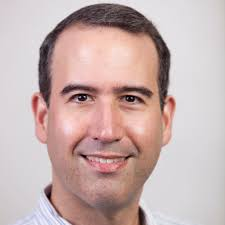

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
[[0.97295827 0.02704166]]
0
The person in the image not wearing a mask


In [ ]:
input_image_path = input('path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('the person in the image is wearing mask')

else:
  print('The person in the image not wearing a mask')

path of the image to be predicted/content/withmask.jpeg


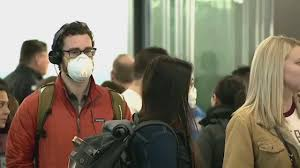

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.00710829 0.99289167]]
1
the person in the image is wearing mask


In [ ]:
input_image_path = input('path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('the person in the image is wearing mask')

else:
  print('The person in the image not wearing a mask')

path of the image to be predicted/content/images (3).jpeg


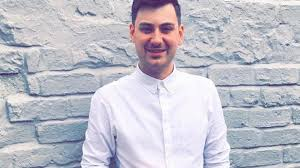

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.923678 0.076322]]
0
The person in the image not wearing a mask


In [ ]:
input_image_path = input('path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('the person in the image is wearing mask')

else:
  print('The person in the image not wearing a mask')